In this notebook we analyze the results of our Monte Carlo experiment. We aim to prove that:
1. Uncertainty reduction (UR) is the empirically dominant strategy by showing that its average profit is greater (for all a, b) 
2. UR fullfills its aim of providing profit variance reduction for the buyer whilst improving profitability overall.
3. We prove the above statements using statistical comparison tests.

In [3]:
import itertools
import pickle
import numpy as np
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Union
import matplotlib.colors as colors


In [4]:
def normalize(x: np.array):
    return (x - np.min(x)) / np.ptp(x)

# 1. Results Analysis and Plots

### **Load dictionaries** from pkl files

In [5]:
# Linear prediction gain function
with open('params_to_profit_percs_lin_4mil.pkl', 'rb') as f:
    params_to_profits = pickle.load(f)

In [6]:
beta_params_range = np.arange(0.01, 20, 0.01)

In [7]:
params_to_profits

{(0.01, 0.01): {'no_ur_profit_avg': 0,
  'no_ur_profit_std': 0,
  'ur_profit_avg': 49.463121489072066,
  'ur_profit_std': 49.690111740248575,
  'ur_num_purchases': 5019,
  'n_rep': 10000},
 (0.01, 0.02): {'no_ur_profit_avg': 0,
  'no_ur_profit_std': 0,
  'ur_profit_avg': 33.24869700532367,
  'ur_profit_std': 46.7488462264582,
  'ur_num_purchases': 3407,
  'n_rep': 10000},
 (0.01, 0.03): {'no_ur_profit_avg': 0,
  'no_ur_profit_std': 0,
  'ur_profit_avg': 25.09093680861041,
  'ur_profit_std': 42.82493108086001,
  'ur_num_purchases': 2622,
  'n_rep': 10000},
 (0.01, 0.04): {'no_ur_profit_avg': 0,
  'no_ur_profit_std': 0,
  'ur_profit_avg': 18.95187712836062,
  'ur_profit_std': 38.63211741464398,
  'ur_num_purchases': 1992,
  'n_rep': 10000},
 (0.01, 0.05): {'no_ur_profit_avg': 0,
  'no_ur_profit_std': 0,
  'ur_profit_avg': 16.35538474016497,
  'ur_profit_std': 36.35320711106612,
  'ur_num_purchases': 1746,
  'n_rep': 10000},
 (0.01, 0.060000000000000005): {'no_ur_profit_avg': 0,
  'no_ur_

In [8]:
dict_df = {
    'a': [],
    'b': [],
    'no_ur_profit_avg': [],
    'no_ur_profit_std': [],
    'ur_profit_avg': [],
    'ur_profit_std': [],
    'ur_num_purchases': []
}

for k, v in params_to_profits.items():
    dict_df['a'].append(k[0])
    dict_df['b'].append(k[1])
    dict_df['no_ur_profit_avg'].append(v['no_ur_profit_avg'])
    dict_df['no_ur_profit_std'].append(v['no_ur_profit_std'])
    dict_df['ur_profit_avg'].append(v['ur_profit_avg'])
    dict_df['ur_profit_std'].append(v['ur_profit_std'])
    dict_df['ur_num_purchases'].append(v['ur_num_purchases'])

In [9]:
df = pl.from_dict(dict_df, schema={
    'a': float, 
    'b': float, 
    'no_ur_profit_avg': float,
    'no_ur_profit_std': float,
    'ur_profit_avg': float,
    'ur_profit_std': float,
    'ur_num_purchases': int
})
df

a,b,no_ur_profit_avg,no_ur_profit_std,ur_profit_avg,ur_profit_std,ur_num_purchases
f64,f64,f64,f64,f64,f64,i64
0.01,0.01,0.0,0.0,49.463121,49.690112,5019
0.01,0.02,0.0,0.0,33.248697,46.748846,3407
0.01,0.03,0.0,0.0,25.090937,42.824931,2622
0.01,0.04,0.0,0.0,18.951877,38.632117,1992
0.01,0.05,0.0,0.0,16.355385,36.353207,1746
0.01,0.06,0.0,0.0,13.664186,33.670043,1477
0.01,0.07,0.0,0.0,10.67344,30.134463,1181
0.01,0.08,0.0,0.0,9.769201,28.936351,1082
0.01,0.09,0.0,0.0,8.805327,27.437537,1000


### **Summary Statistics**

In [154]:
df.filter(pl.col('no_ur_profit_avg') < 0).shape[0]

8351

In [155]:
df.filter(pl.col('ur_profit_avg') < 0).shape[0]

0

In what proportion are both greater than 0?

In [24]:
df_both_greater_0 = df.filter((pl.col("ur_profit_avg") > 0) & (pl.col("no_ur_profit_avg") > 0))

In [157]:
print(f'Both are greater than 0 in {(df.shape[0] - df_both_greater_0.shape[0]) / df.shape[0] * 100}% of samples')

Both are greater than 0 in 50.22105% of samples


In [158]:
n_ur_greater = df.filter(pl.col('ur_profit_avg') > pl.col('no_ur_profit_avg')).shape[0]
print(f'UR has larger average than nonUR in {n_ur_greater / df.shape[0] * 100}% of samples' )

UR has larger average than nonUR in 100.0% of samples


UR has larger average profit in all samples. Hence, it is empirically the dominant strategy.

In [159]:
def mad(arr, axis=None, keepdims=True):
    median = np.median(arr, axis=axis, keepdims=True)
    mad = np.median(np.abs(arr - median), axis=axis, keepdims=keepdims)
    return mad[0]

def print_summary_stats(col):
    mean = col.mean()
    median = col.median()
    std = col.std()
    var = col.var()
    skew = col.skew()
    kurt = col.kurtosis()
    mx = col.max()
    mean_abs_dev = mad(col.to_numpy())
    print(f'Mean = {mean:.3f}')
    print(f'Median = {median:.3f}')
    print(f'Std = {std:.3f}')
    print(f'Var = {var:.3f}')
    print(f'Skew = {skew:.3f}')
    print(f'Kurtosis = {kurt:.3f}')
    print(f'Max = {mx:.3f}')
    print(f'Mad = {mean_abs_dev:.3f}')

Compute summary statistics for the averages

In [160]:
print('UR')
print('-------------------------')
print_summary_stats(df['ur_profit_avg'])


print('\nNo UR')
print('-------------------------')
print_summary_stats(df['no_ur_profit_avg'])

UR
-------------------------
Mean = 19.329
Median = 12.076
Std = 20.844
Var = 434.471
Skew = 1.745
Kurtosis = 2.636
Max = 99.709
Mad = 8.316

No UR
-------------------------
Mean = 13.813
Median = 0.000
Std = 22.415
Var = 502.442
Skew = 1.866
Kurtosis = 2.748
Max = 99.698
Mad = 0.000


In [40]:
19.329 - 13.813

5.516

In [161]:
print('UR (both greater than 0)')
print('-------------------------')
print_summary_stats(df_both_greater_0['ur_profit_avg'])

print('\nNo UR (both greater than 0)')
print('-----------------------------')
print_summary_stats(df_both_greater_0['no_ur_profit_avg'])

UR (both greater than 0)
-------------------------
Mean = 33.236
Median = 24.812
Std = 21.734
Var = 472.374
Skew = 1.228
Kurtosis = 0.573
Max = 99.709
Mad = 10.198

No UR (both greater than 0)
-----------------------------
Mean = 27.749
Median = 19.409
Std = 24.952
Var = 622.607
Skew = 1.039
Kurtosis = 0.134
Max = 99.698
Mad = 14.035


### **Marginal Distributions**

Plot marginal for UR (unfiltered)

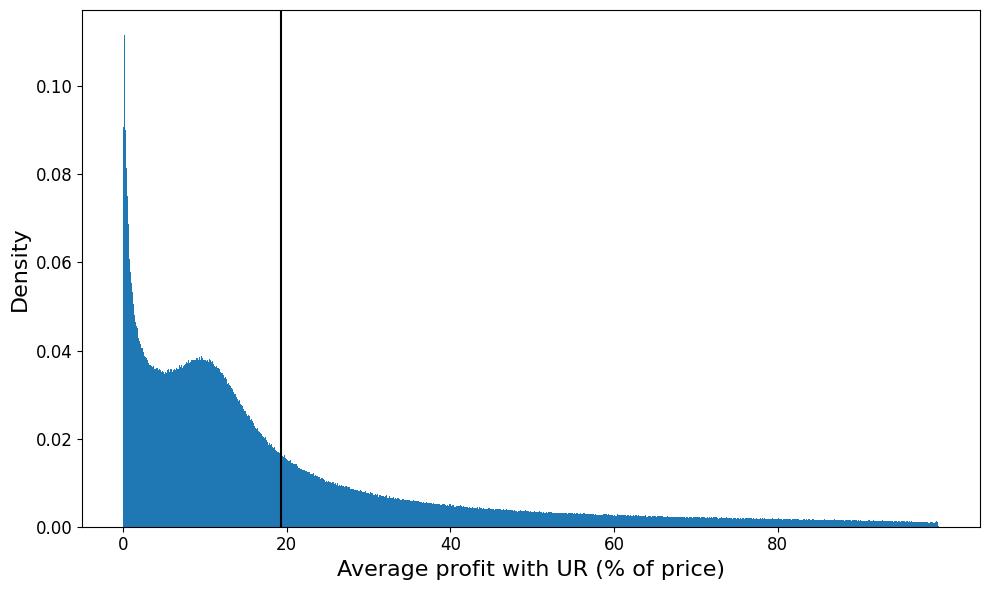

In [162]:
fig,ax = plt.subplots(figsize=(10, 6)) 

ax.hist(df['ur_profit_avg'], bins=1000, density=True)

plt.xlabel('Average profit with UR (% of price)', fontsize=16)
plt.ylabel('Density', fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

plt.axvline(x=df['ur_profit_avg'].mean(), color='black')

ax.set_xticks(np.arange(0, 100, step=20))

plt.tight_layout()
plt.show()

Plot marginal for UR (both greater than 0)

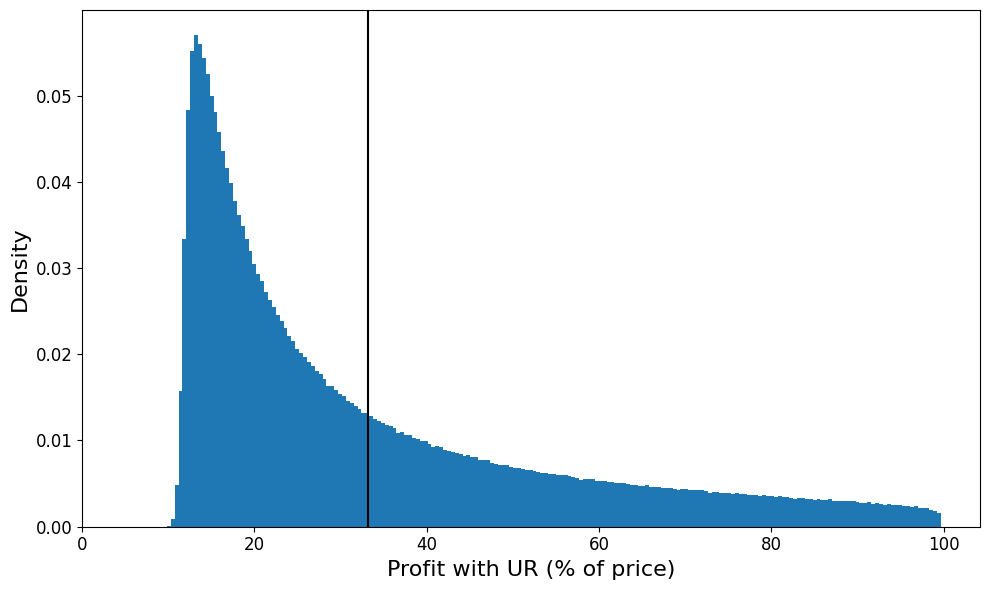

In [45]:
fig,ax = plt.subplots(figsize=(10, 6)) 

ax.hist(df_both_greater_0['ur_profit_avg'], bins=200, density=True)

plt.xlabel('Profit with UR (% of price)', fontsize=16)
plt.ylabel('Density', fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

plt.axvline(x=df_both_greater_0['ur_profit_avg'].mean(), color='black')

ax.set_xticks(np.arange(0, 120, step=20))

plt.tight_layout()
plt.show()

Plot marginal without UR (unfiltered)

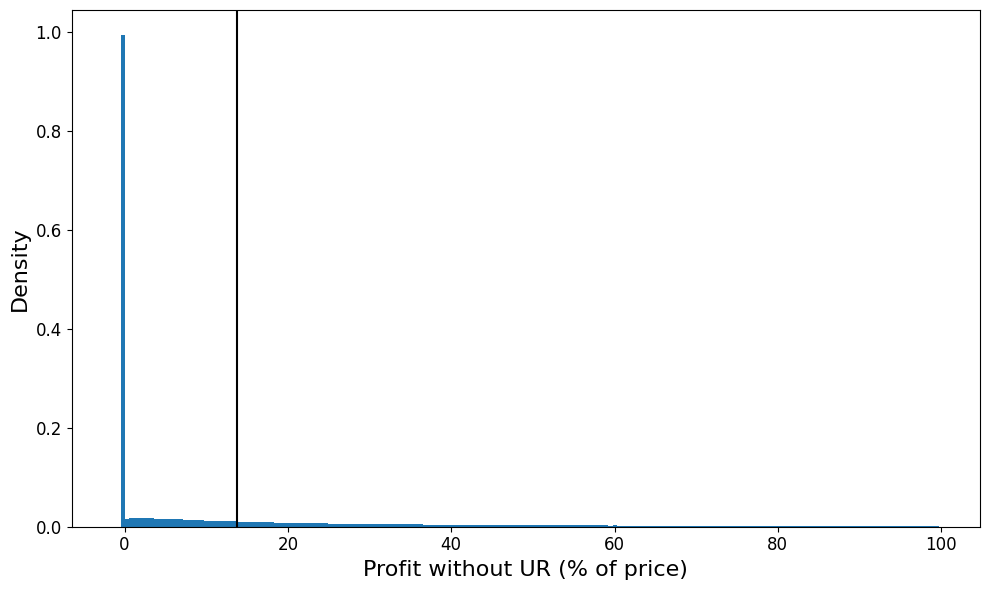

In [166]:
fig,ax = plt.subplots(figsize=(10, 6)) 

ax.hist(df['no_ur_profit_avg'], bins=200, density=True)

plt.xlabel(f'Profit without UR (% of price)', fontsize=16)
plt.ylabel(f'Density', fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

plt.axvline(x=df['no_ur_profit_avg'].mean(), color='black')

ax.set_xticks(np.arange(0, 120, step=20))

plt.tight_layout()
plt.show()

Plot marginal without UR (both greater than 0)

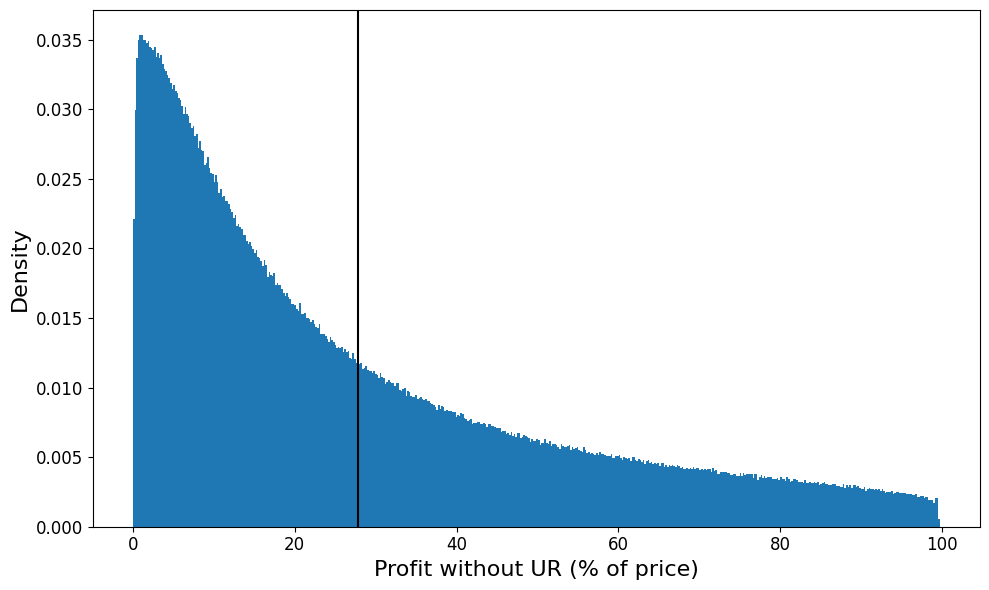

In [42]:
fig,ax = plt.subplots(figsize=(10, 6)) 

ax.hist(df_both_greater_0['no_ur_profit_avg'], bins=500, density=True)

plt.xlabel(f'Profit without UR (% of price)', fontsize=16)
plt.ylabel(f'Density', fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

plt.axvline(x=df_both_greater_0['no_ur_profit_avg'].mean(), color='black')
ax.set_xticks(np.arange(0, 120, step=20))

plt.tight_layout()
plt.show()

Plot marginal of average profit differences (unfiltered)

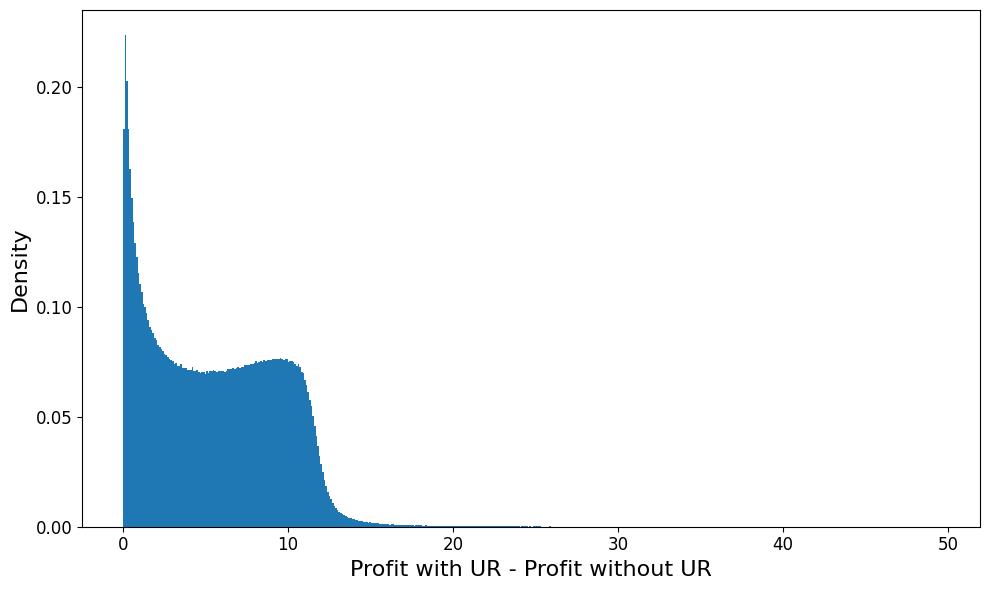

In [171]:
fig,ax = plt.subplots(figsize=(10, 6)) 
ax.hist(df["ur_profit_avg"] - df["no_ur_profit_avg"], bins=500, edgecolor='None', density=True)

plt.xlabel(f'Profit with UR - Profit without UR', fontsize=16)
plt.ylabel(f'Density', fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

plt.tight_layout()
plt.show()

Plot marginal of average profit differences (both greater than 0)

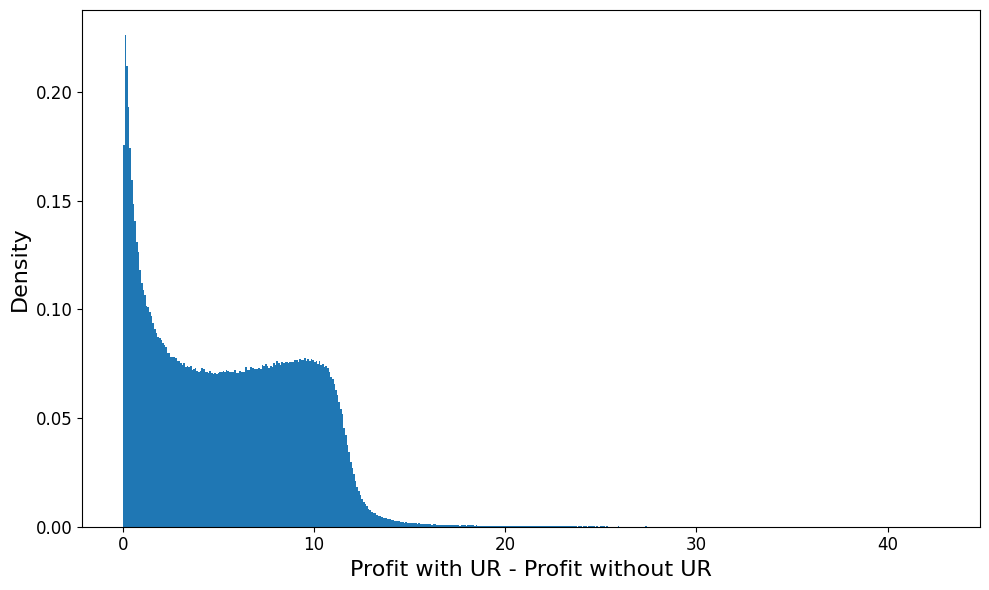

In [44]:
fig,ax = plt.subplots(figsize=(10, 6)) 
ax.hist(df_both_greater_0["ur_profit_avg"] - df_both_greater_0["no_ur_profit_avg"], bins=500, edgecolor='None', density=True)

plt.xlabel(f'Profit with UR - Profit without UR', fontsize=16)
plt.ylabel(f'Density', fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

plt.tight_layout()
plt.show()

### **Joint Distribution**

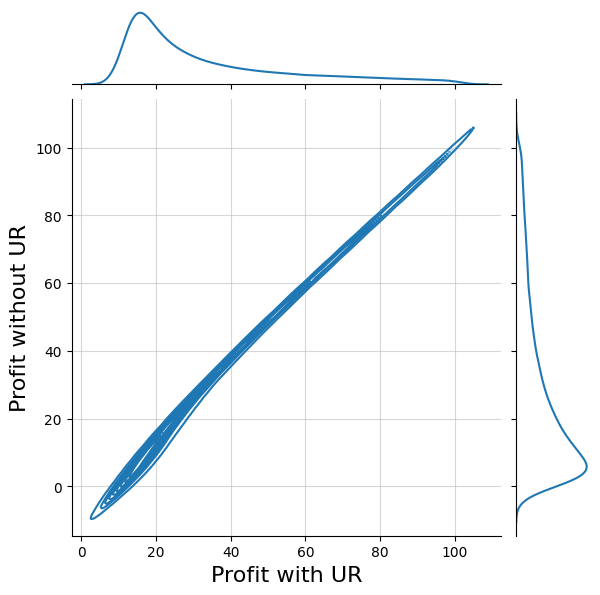

In [90]:
sns.jointplot(data=df_both_greater_0, x="ur_profit_avg", y="no_ur_profit_avg", kind='kde')

plt.xlabel(f'Profit with UR', fontsize=16)
plt.ylabel(f'Profit without UR', fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

plt.grid(alpha=0.5)

plt.show()

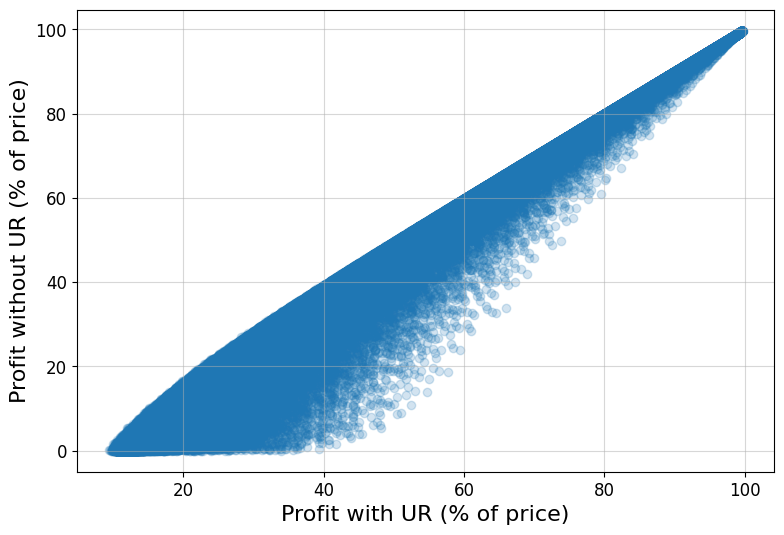

In [173]:
x = df_both_greater_0['ur_profit_avg']
y = df_both_greater_0['no_ur_profit_avg']

# Create the joint distribution plot
plt.scatter(x, y, alpha=0.2)

# Add axis labels and title
plt.xlabel('Profit with UR (% of price)', fontsize=16)
plt.ylabel('Profit without UR (% of price)', fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

plt.grid(alpha=0.5)

# Show the plot
plt.show()


**Log joint distribution** when both are greater than 0

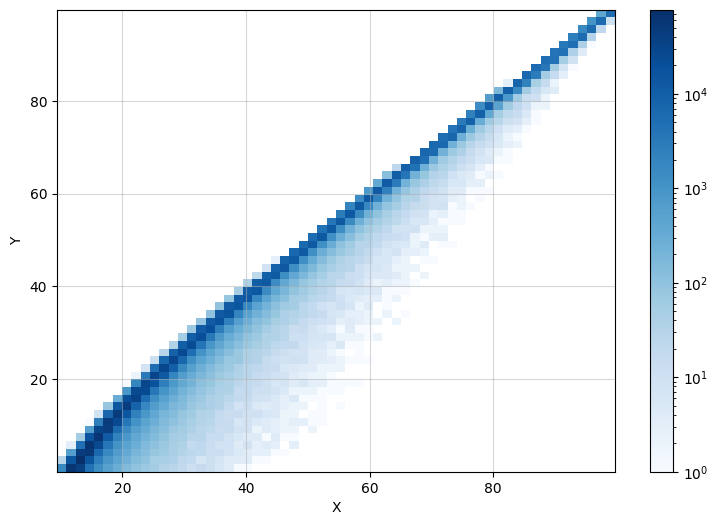

In [174]:
x = df_both_greater_0['ur_profit_avg']
y = df_both_greater_0['no_ur_profit_avg']


# Create a 2D histogram to get the density
counts, xedges, yedges, _ = plt.hist2d(x, y, bins=60, cmap='Blues', norm=colors.LogNorm())

# Create a grid of points to evaluate the density at
xgrid, ygrid = np.meshgrid(xedges[:-1], yedges[:-1])

# # Evaluate the density at each point in the grid
# density = np.transpose(counts)
# # Create the joint distribution plot
# plt.contour(xgrid, ygrid, density, levels=3, colors='k')

# Add color bar and axis labels
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')

plt.grid(alpha=0.5)

# Show the plot
plt.show()


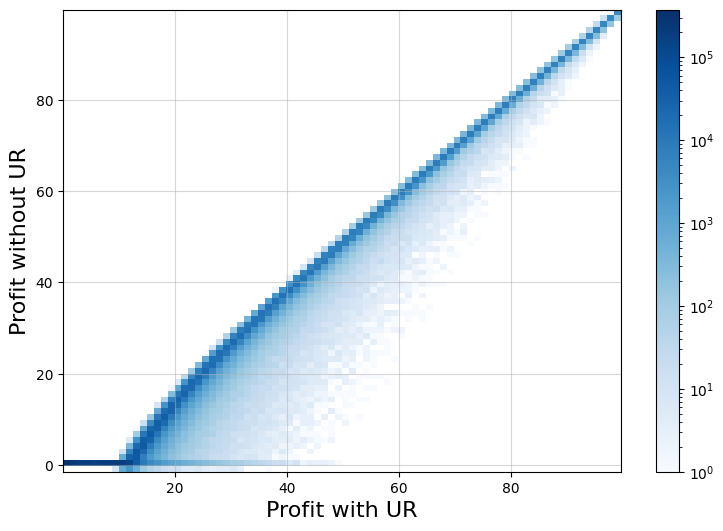

In [175]:
x = df['ur_profit_avg']
y = df['no_ur_profit_avg']

plt.rcParams["figure.figsize"] = (9, 6)

# Create the joint distribution plot
plt.hist2d(x, y, bins=80, cmap='Blues', norm=colors.LogNorm())

# Add color bar and axis labels
plt.colorbar()
plt.xlabel('Profit with UR', fontsize=16)
plt.ylabel('Profit without UR', fontsize=16)

plt.grid(alpha=0.5)

# Show the plot
plt.show()

Joint distribution when they are different from each other

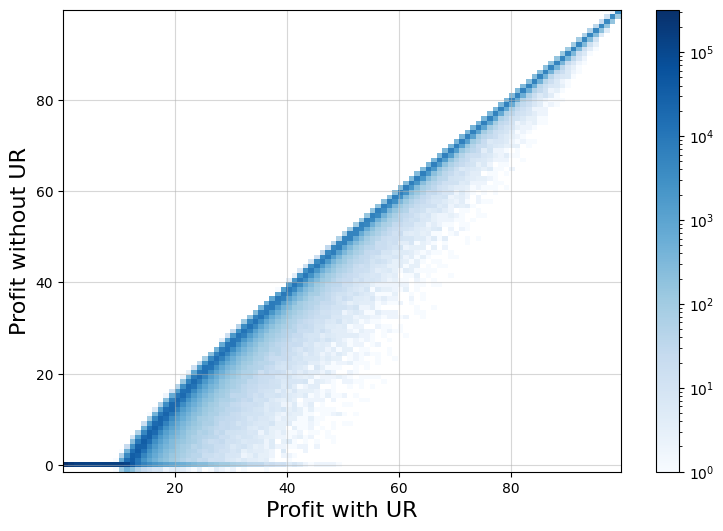

In [176]:
df_different = df.filter(pl.col("ur_profit_avg") != pl.col("no_ur_profit_avg"))

# Generate some data
x = df_different['ur_profit_avg']
y = df_different['no_ur_profit_avg']

plt.rcParams["figure.figsize"] = (9, 6)

# Create the joint distribution plot
plt.hist2d(x, y, bins=100, cmap='Blues', norm=colors.LogNorm())

# Add color bar and axis labels
plt.colorbar()
plt.xlabel('Profit with UR', fontsize=16)
plt.ylabel('Profit without UR', fontsize=16)

plt.grid(alpha=0.5)

# Show the plot
plt.show()

### **3D Surface** in terms of a, b

With UR (unfiltered)

In [177]:
fig = plt.figure(figsize = (14, 8))
ax = plt.axes(projection='3d')

a = df['a'].to_numpy()
b = df['b'].to_numpy()
no_ur_profit_avg = df['ur_profit_avg'].to_numpy()

surf = ax.plot_trisurf(a, b, no_ur_profit_avg, cmap=plt.cm.coolwarm)

# Set axes label
fontdict = {
  'family': 'serif',
  'color':  'black',
  'weight': 'normal',
  'size': 18,
}
ax.set_xlabel('$a$', labelpad=15, fontdict=fontdict)
ax.set_ylabel('$b$', labelpad=15, fontdict=fontdict)
ax.set_zlabel('Profit without UR', labelpad=15, fontdict=fontdict)

# ax_xlocator = FixedLocator(np.log(cv_mean_mse_df['gamma'].unique()))
# ax_ylocator = FixedLocator(np.log(cv_mean_mse_df['sigma'].unique()))
# ax.xaxis.set_major_locator(ax_xlocator)
# ax.yaxis.set_major_locator(ax_ylocator)

# ax.xaxis.set_major_formatter(gamma_formatter)
# ax.yaxis.set_major_formatter(sigma_formatter)

fig.colorbar(surf, shrink=0.5, aspect=8)
plt.tight_layout()
ax.view_init(30, 60)
plt.show()

Without UR (unfiltered)

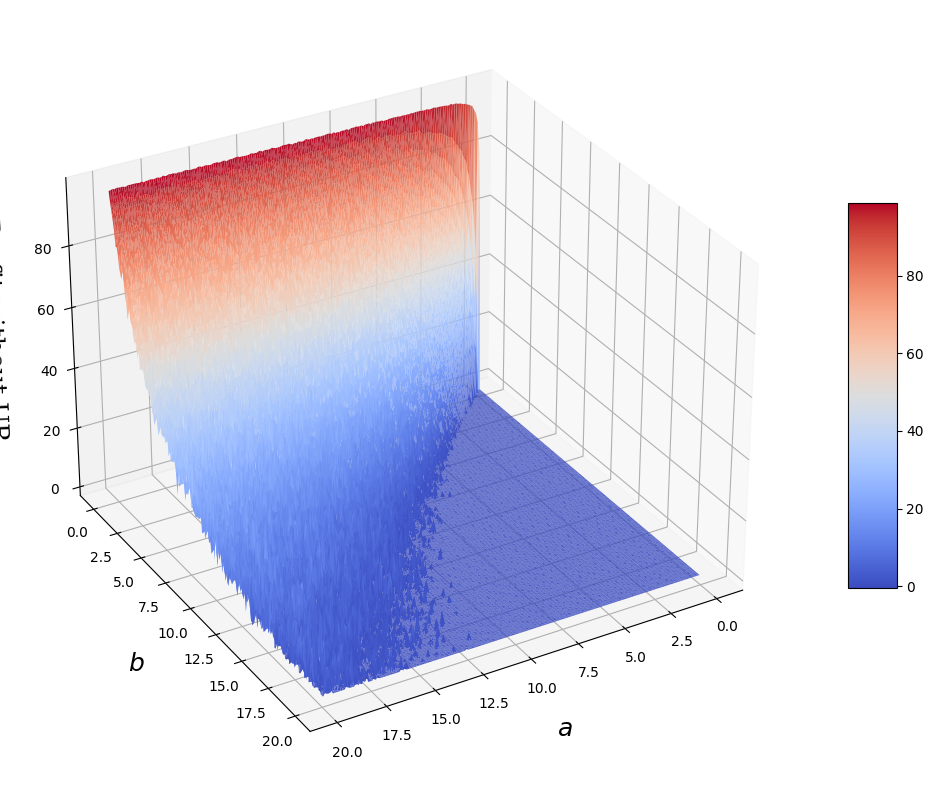

In [120]:
fig = plt.figure(figsize = (14, 8))
ax = plt.axes(projection='3d')

a = df['a'].to_numpy()
b = df['b'].to_numpy()
no_ur_profit_avg = df['no_ur_profit_avg'].to_numpy()

surf = ax.plot_trisurf(a, b, no_ur_profit_avg, cmap=plt.cm.coolwarm)

# Set axes label
fontdict = {
  'family': 'serif',
  'color':  'black',
  'weight': 'normal',
  'size': 18,
}
ax.set_xlabel('$a$', labelpad=15, fontdict=fontdict)
ax.set_ylabel('$b$', labelpad=15, fontdict=fontdict)
ax.set_zlabel('Profit without UR', labelpad=15, fontdict=fontdict)

fig.colorbar(surf, shrink=0.5, aspect=8)
plt.tight_layout()
ax.view_init(30, 60)
plt.show()

Difference (unfiltered)

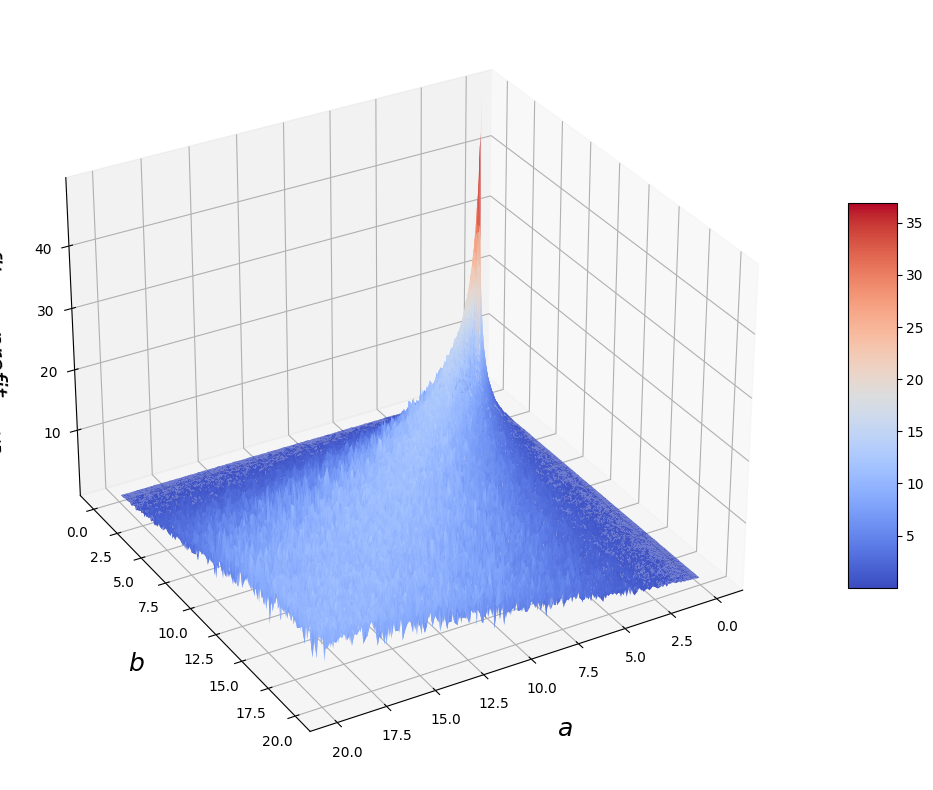

In [127]:
import matplotlib.ticker as mticker

fig = plt.figure(figsize = (14, 8))
ax = plt.axes(projection='3d')

a = df['a'].to_numpy()
b = df['b'].to_numpy()
profit_avg_diff = df['ur_profit_avg'].to_numpy() - df['no_ur_profit_avg'].to_numpy()

surf = ax.plot_trisurf(a, b, profit_avg_diff, cmap=plt.cm.coolwarm)

# Set axes label
fontdict = {
  'family': 'serif',
  'color':  'black',
  'weight': 'normal',
  'size': 18,
}
ax.set_xlabel('$a$', labelpad=15, fontdict=fontdict)
ax.set_ylabel('$b$', labelpad=15, fontdict=fontdict)
ax.set_zlabel('$Profit with UR - Profit without UR$', labelpad=15, fontdict=fontdict)

# def log_tick_formatter(val, pos=None):
#     return "{:.2e}".format(10**val)

# ax.zaxis.set_major_formatter((mticker.FuncFormatter(log_tick_formatter)))

ax.view_init(30, 60)

fig.colorbar(surf, shrink=0.5, aspect=8)
plt.tight_layout()
plt.show()

Plot standard deviation with UR

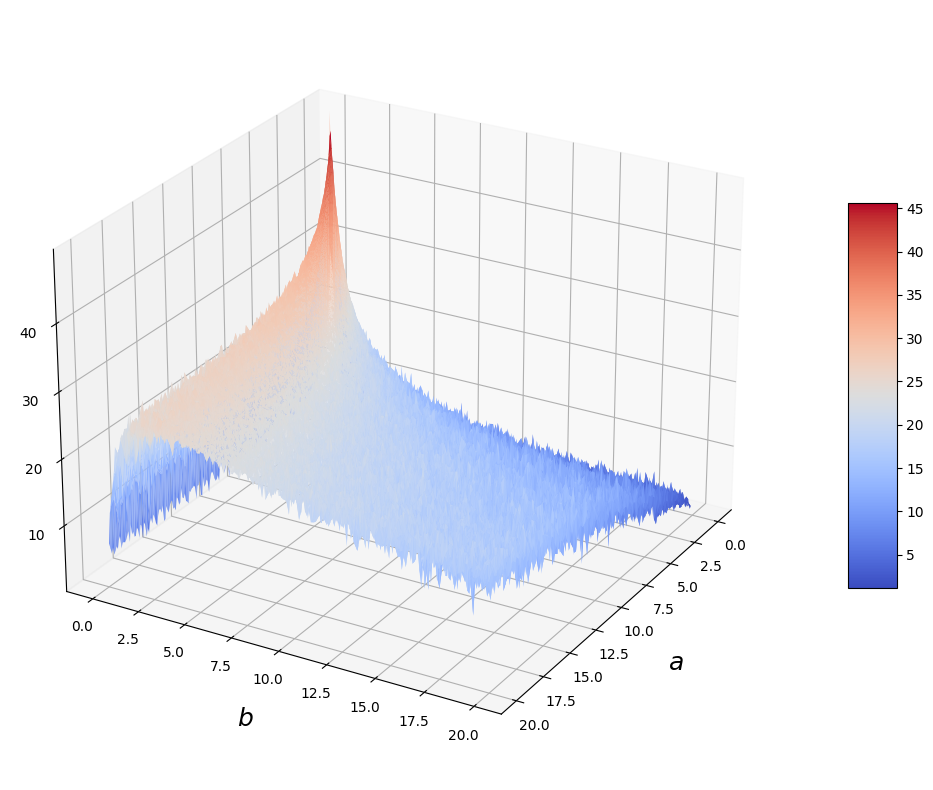

In [138]:
fig = plt.figure(figsize = (14, 8))
ax = plt.axes(projection='3d')

# df_ur_greater_0 = df.filter(pl.col('ur_profit_avg') > 0)

a = df['a'].to_numpy()
b = df['b'].to_numpy()
ur_profit_std = df['ur_profit_std'].to_numpy()

surf = ax.plot_trisurf(a, b, ur_profit_std, cmap=plt.cm.coolwarm)

# Set axes label
fontdict = {
  'family': 'serif',
  'color':  'black',
  'weight': 'normal',
  'size': 18,
}
ax.set_xlabel('$a$', labelpad=15, fontdict=fontdict)
ax.set_ylabel('$b$', labelpad=15, fontdict=fontdict)
ax.set_zlabel('Profit standard deviation (UR)', labelpad=15, fontdict=fontdict)

fig.colorbar(surf, shrink=0.5, aspect=8)
plt.tight_layout()
ax.view_init(25, 30)
plt.show()

Plot standard deviation without UR

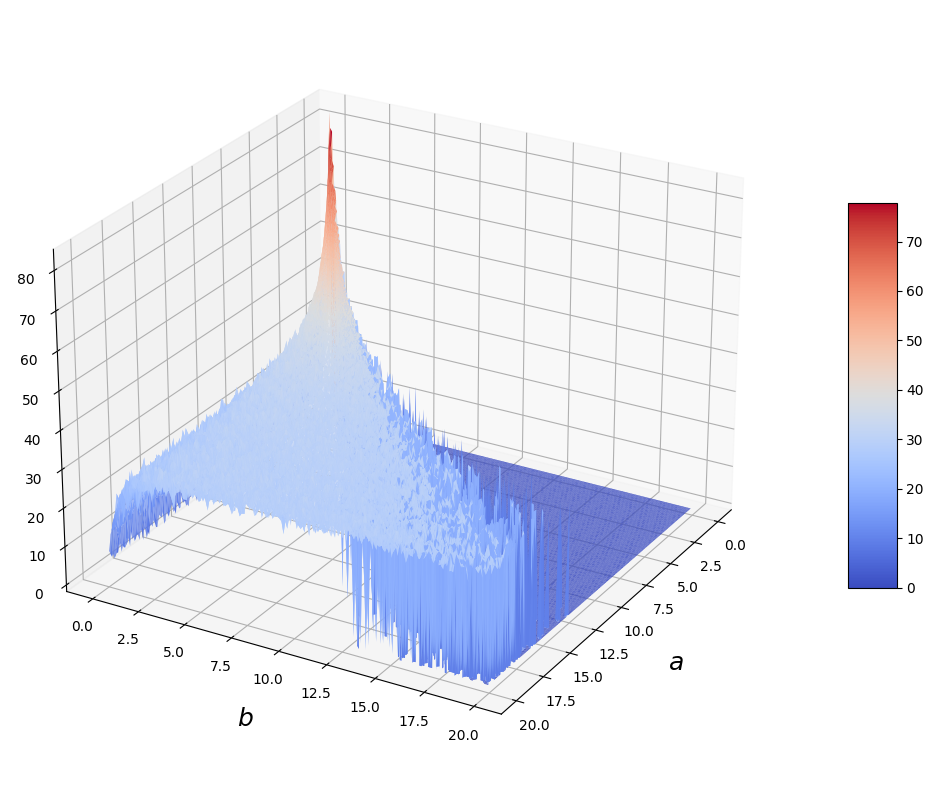

In [137]:
fig = plt.figure(figsize = (14, 8))
ax = plt.axes(projection='3d')

a = df['a'].to_numpy()
b = df['b'].to_numpy()
ur_profit_std = df['no_ur_profit_std'].to_numpy()

surf = ax.plot_trisurf(a, b, ur_profit_std, cmap=plt.cm.coolwarm)

# Set axes label
fontdict = {
  'family': 'serif',
  'color':  'black',
  'weight': 'normal',
  'size': 18,
}
ax.set_xlabel('$a$', labelpad=15, fontdict=fontdict)
ax.set_ylabel('$b$', labelpad=15, fontdict=fontdict)
ax.set_zlabel('Profit standard deviation (no UR)', labelpad=15, fontdict=fontdict)

fig.colorbar(surf, shrink=0.5, aspect=8)
plt.tight_layout()
ax.view_init(25, 30)
plt.show()

a,b,no_ur_profit_avg,no_ur_profit_std,ur_profit_avg,ur_profit_std,ur_num_purchases
f64,f64,f64,f64,f64,f64,i64
4.71,6.41,0.0,0.0,8.20468,15.479643,3491


### **Profit distribution** for a specific choice of a, b

In [143]:
df_single_ab = df.filter((pl.col('a') == 4.71) & (pl.col('b') == 6.41))
df_single_ab

a,b,no_ur_profit_avg,no_ur_profit_std,ur_profit_avg,ur_profit_std,ur_num_purchases
f64,f64,f64,f64,f64,f64,i64
4.71,6.41,0.0,0.0,8.20468,15.479643,3491


### **Beta Distributions**

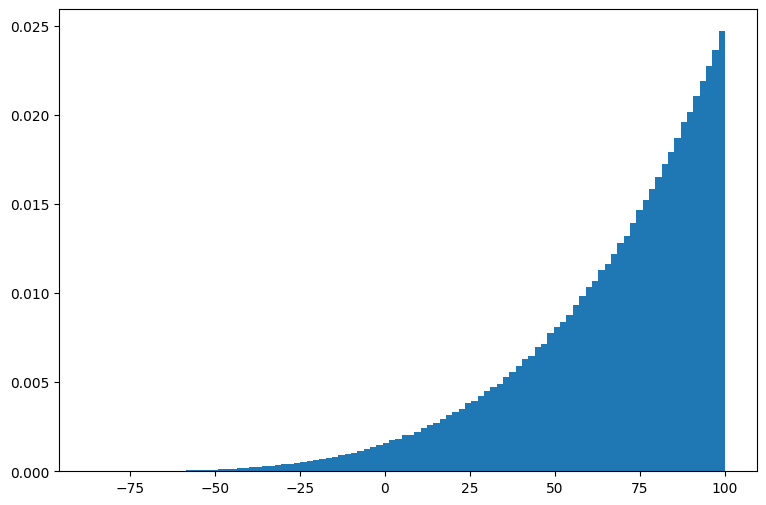

In [ ]:
rng = np.random.default_rng(187293)

# Sample the true delta performance (normalize to [-100, 100])
deltas_true = rng.beta(a=20, b=20, size=1000000) * 200 - 100

plt.hist(deltas_true, bins=100, density=True)

plt.show()


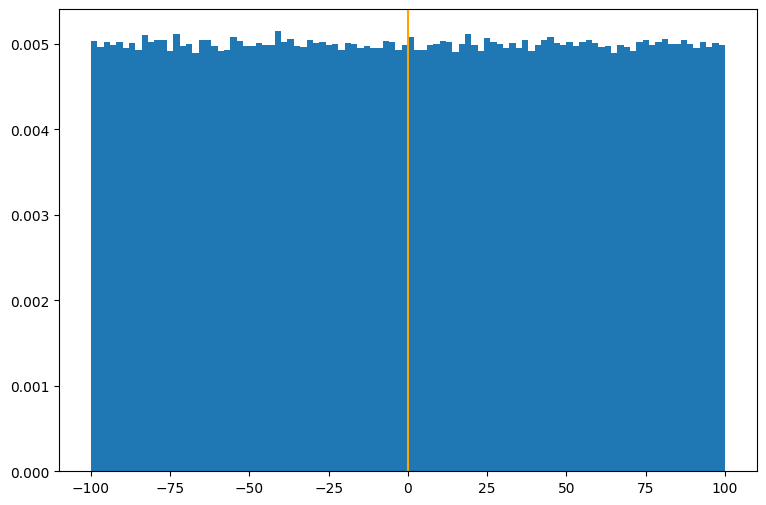

In [118]:
rng = np.random.default_rng(187293)

# Sample the true delta performance (normalize to [-100, 100])
deltas_true = rng.beta(a=1, b=1, size=1000000) * 200 - 100

plt.hist(deltas_true, bins=100, density=True)

plt.axvline(x=deltas_true.mean(), color='orange')


plt.show()


# 2. Statistical Tests

## **Wilcoxon Signed Rank Test** (no normality assumption)

In [34]:
from scipy.stats import wilcoxon, levene

Test average profit. Let d = avg_profit_ur - avg_profit_no_ur.

Null hypothesis: d = 0.
Alternate hypothesis

In [16]:
res_wilcox = wilcoxon(
    x=df['ur_profit_avg'],
    y=df['no_ur_profit_avg'],
    zero_method='wilcox',
    alternative='greater'
)

In [17]:
res_wilcox.statistic, res_wilcox.pvalue

(8000002000000.0, 0.0)

In [31]:
res_wilcox.statistic / 10**12

8.000002

In [35]:
res_levene = levene(
    df['ur_profit_avg'],
    df['no_ur_profit_avg'],
)

In [39]:
res_levene.statistic, res_levene.pvalue

(23.00858006414671, 1.6128289076158857e-06)

Plot distribution of sigma

In [20]:
var_ur_profit_avg = df['ur_profit_avg'].std()**2
var_no_ur_profit_avg = df['no_ur_profit_avg'].std()**2
var_ur_profit_avg, var_no_ur_profit_avg

(434.4708152162511, 502.4418571329717)

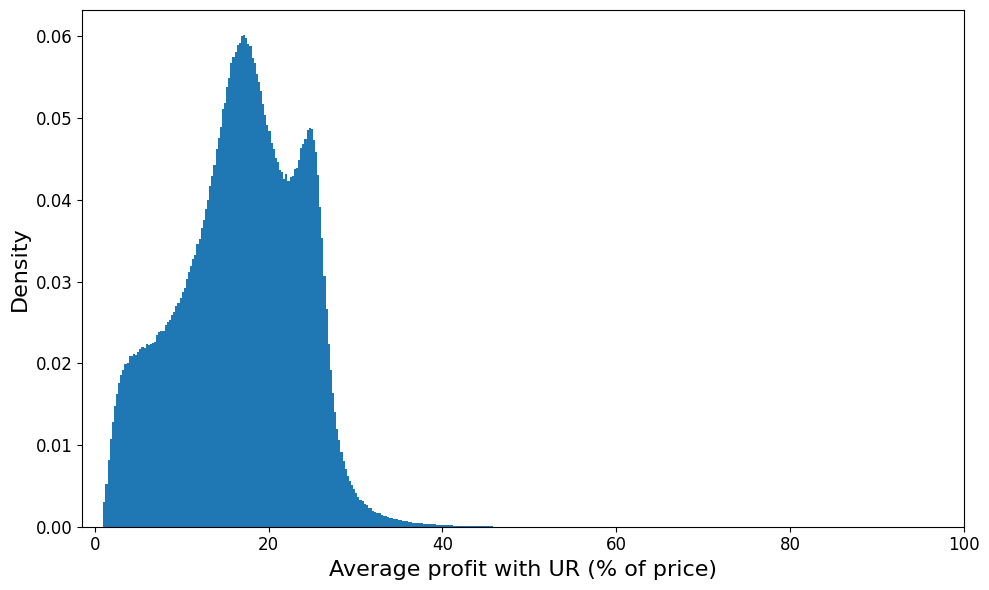

In [21]:
fig,ax = plt.subplots(figsize=(10, 6)) 

ax.hist(df['ur_profit_std'], bins=200, density=True)

plt.xlabel('Average profit with UR (% of price)', fontsize=16)
plt.ylabel('Density', fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)


ax.set_xticks(np.arange(0, 120, step=20))

plt.tight_layout()
plt.show()

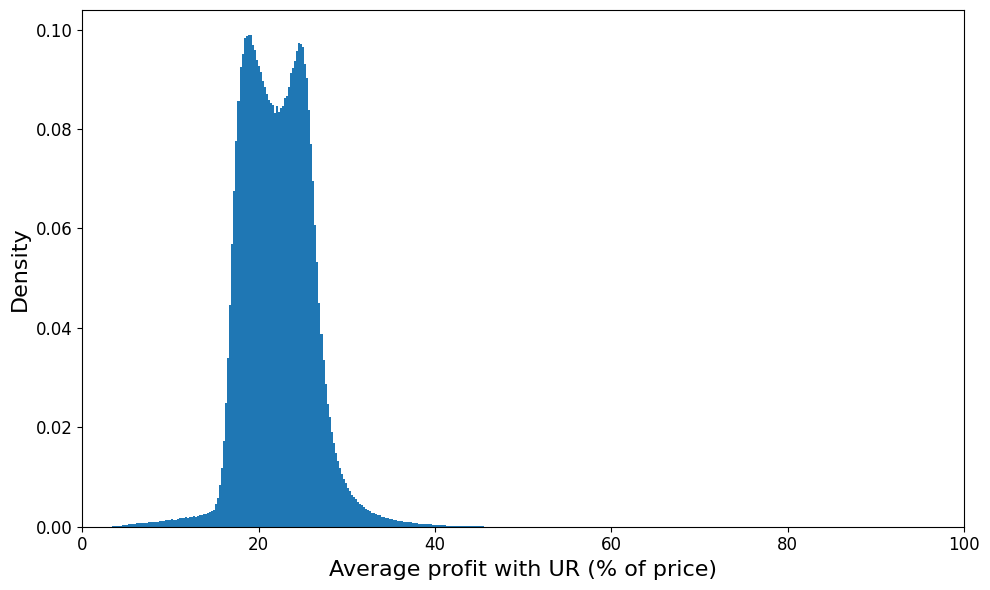

In [26]:
fig,ax = plt.subplots(figsize=(10, 6)) 

ax.hist(df_both_greater_0['ur_profit_std'], bins=200, density=True)

plt.xlabel('Average profit with UR (% of price)', fontsize=16)
plt.ylabel('Density', fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)


ax.set_xticks(np.arange(0, 120, step=20))

plt.tight_layout()
plt.show()